# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус
* придумаем свою модель на основе проведенного анализа и сравним с результатом работы метода ближайших соседей

## Подключение библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные

In [5]:
Data = pd.read_csv('titanic.csv', sep = ';')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/evgpat/hse_ml_light_autumn_2023/main/datasets/titanic.csv",
    sep=";"
)

URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

### Задание 1

Выведите на экран размеры таблицы

In [6]:
# ваш код здесь
Data.shape

(891, 12)

In [7]:
Data.shape[0], len(Data)

(891, 891)

In [8]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения
2) Переведём категориальные признаки в числовые

### Задание 2

Выведите основные числовые характеристики числовых столбцов

In [12]:
Data.isnull().sum(axis=1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Data.head()

In [16]:
Data['Age'] = Data['Age'].fillna(Data['Age'].median())

In [17]:
Data['Age'].isnull().sum()

0

Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак `Sex`**

### Задание 3

Проверьте, есть ли пропуски в столбце

In [18]:
Data['Sex'].isnull().sum()

0

### Задание 4

Удалите пассажиров неизвестного пола, так как их всего 5

In [20]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

In [21]:
Data1 = Data.copy()

In [23]:
not_need_index = Data1[Data1['Sex'] == 'unknown'].index

In [25]:
Data1.drop(not_need_index, inplace=True)

In [26]:
Data1.shape[0]

886

Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории `unknown`?

In [27]:
Data1.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund; Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [38]:
Data['is_man'] = (Data['Name'].str.find('Mr.') != -1).astype(int)
Data['is_woman'] = ((Data['Name'].str.find('Miss.') != -1)|(Data['Name'].str.find('Mrs.') != -1)).astype(int)

In [40]:
Data.groupby(['is_man', 'is_woman']).size()

is_man  is_woman
0       0            67
        1           307
1       0           517
dtype: int64

In [42]:
Data[(Data['is_man']==0)&(Data['is_woman']==0)]['Sex'].value_counts()

male       59
female      7
unknown     1
Name: Sex, dtype: int64

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

### Задание 5

Придумайте кодировку и сделайте её

In [48]:
new = pd.get_dummies(Data['Sex'])

In [49]:
Data[new.columns]=new

In [50]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_man,is_woman,female,male,unknown
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,0
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,0,0
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0


Посмотрим, как влияет пол на выживаемость

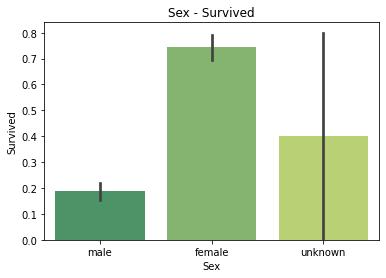

In [51]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

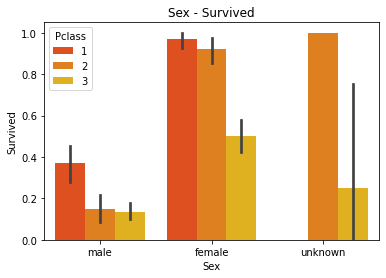

In [52]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту

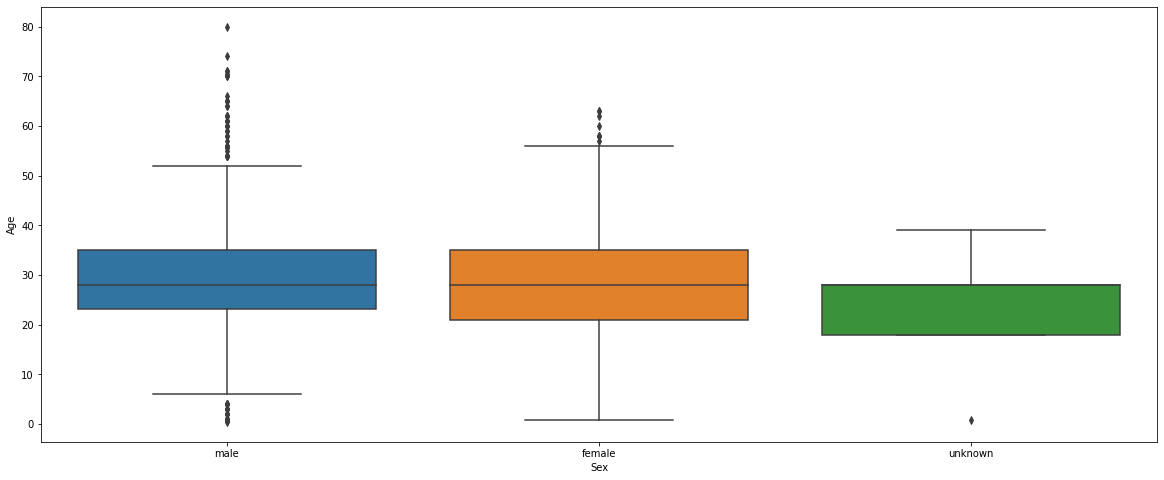

In [56]:
plt.figure(figsize = (20, 8))
sns.boxplot(x="Sex", y="Age", data=Data) # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по `Pclass`

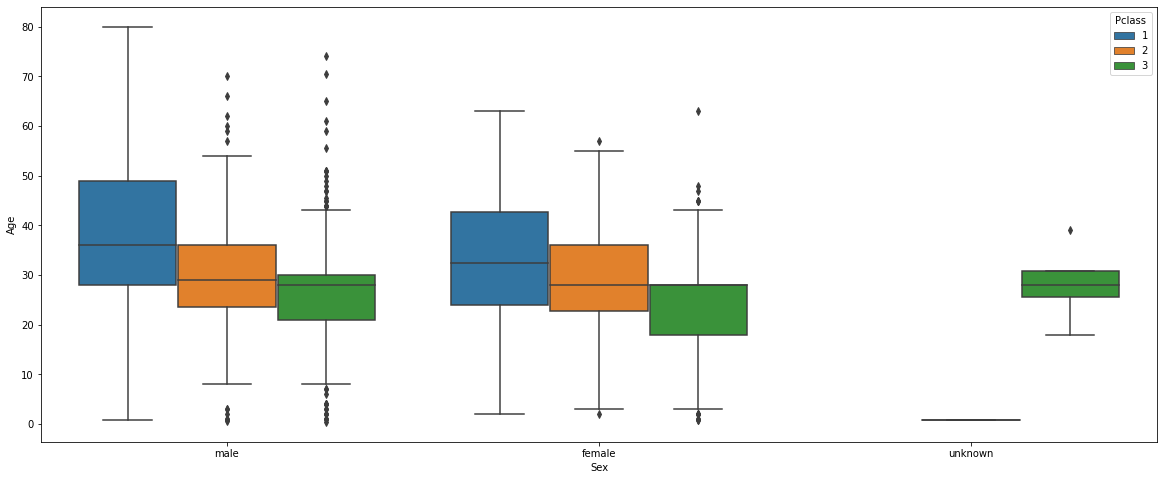

In [59]:
plt.figure(figsize = (20, 8))
sns.boxplot(x="Sex", y="Age",hue ="Pclass", data=Data)
plt.show()

**Обработаем признак `Embarked`**

In [60]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


(891, 17)

In [66]:
not_need = Data[Data['Embarked'].isnull()].index

In [63]:
Data[Data['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_man,is_woman,female,male,unknown
61,62,1,1,Icard; Miss. Amelie,female,38.0,0,0,113572,80.0,B28,NaN,0,1,1,0,0
829,830,1,1,Stone; Mrs. George Nelson (Martha Evelyn),female,62.0,0,0,113572,80.0,B28,NaN,0,1,1,0,0


In [68]:
Data.drop(not_need, inplace= True)

In [69]:
Data[Data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_man,is_woman,female,male,unknown


### Задание 6

Удалим из таблицы пассажиров, для которых неизвестен порт посадки (`Embarked`)

In [70]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(889, 17)

### Задание 7

Закодируем столбец `Embarked` с помощью OneHot-кодирования (`pd.get_dummies`)

In [77]:
Data = Data1

In [78]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак `Age`**

Проверьте, если ли в `Age` пропущенные значения

In [79]:
Data['Age'].isnull().sum()

0

Заполним пропуски медианным значением `Age`

In [80]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров

C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


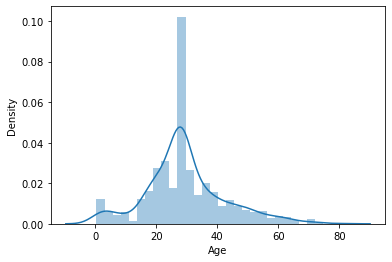

In [81]:
sns.distplot(Data['Age'], kde=True)
plt.show()

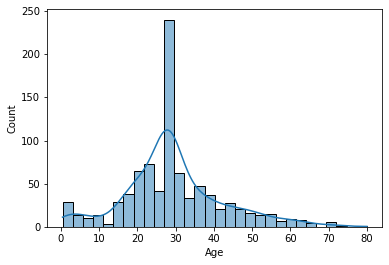

In [82]:
sns.histplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение `Pclass` по возрастам

C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


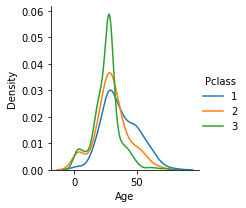

In [84]:
facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак `Fare`**

1) Проверьте, если ли в `Fare` пропущенные значения
2) Если пропущенные значения есть, заполните их медианным значением `Fare`

In [ ]:
# ваш код здесь

**Обработаем признак `Pclass`**

Есть ли в `Pclass` пропущенные значения?

In [85]:
Data['Pclass'].value_counts()

3    487
1    216
2    183
Name: Pclass, dtype: int64

### Задание 8

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`

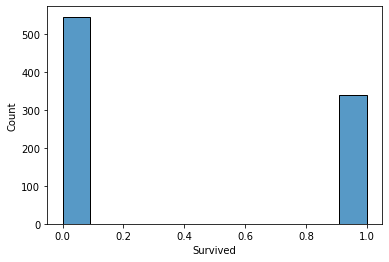

In [88]:
sns.histplot(Data['Survived'])
plt.show()

C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


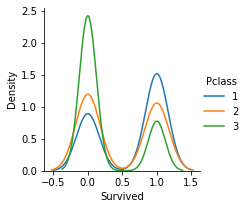

In [89]:
facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Survived")
facet.add_legend();

**Обработаем признак `SibSp` (число братьев или сестер, мужей, жен)**

Есть ли в `SibSp` пропущенные значения?

In [90]:
Data['SibSp'].value_counts()

0    605
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак `Parch` (число родителей/детей)**

Есть ли в `Parch` пропущенные значения?

In [91]:
Data['Parch'].value_counts()

0    675
1    118
2     79
3      5
5      4
4      4
6      1
Name: Parch, dtype: int64

### Задание 9

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его

In [94]:
Data.drop('PassengerId', axis = 1, inplace = True)

In [95]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,1


## Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной

### Задание 10

Создайте таблицу `NumericData`, которая содержит только числовые столбцы из таблицы `Data`

In [97]:
# ваш код здесь
NumericData = Data.select_dtypes(include = 'number')

In [98]:
NumericData.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,0,3,35.0,0,0,8.0500,0,1


In [99]:
NumericData.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338447,-0.062245,-0.033743,0.085753,0.258216,0.001826,-0.155577
Pclass,-0.338447,1.000000,-0.342216,0.083148,0.015606,-0.549398,0.218389,0.084268
Age,-0.062245,-0.342216,1.000000,-0.235465,-0.177241,0.096507,-0.031932,-0.013528
SibSp,-0.033743,0.083148,-0.235465,1.000000,0.422104,0.159394,-0.023044,0.069236
Parch,0.085753,0.015606,-0.177241,0.422104,1.000000,0.220608,-0.077893,0.057712
Fare,0.258216,-0.549398,0.096507,0.159394,0.220608,1.000000,-0.115235,-0.168756
Embarked_Q,0.001826,0.218389,-0.031932,-0.023044,-0.077893,-0.115235,1.000000,-0.491888
Embarked_S,-0.155577,0.084268,-0.013528,0.069236,0.057712,-0.168756,-0.491888,1.000000


In [101]:
NumericData.corr(method = 'spearman')

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.339374,-0.034853,0.092952,0.138455,0.326109,0.001826,-0.155577
Pclass,-0.339374,1.000000,-0.320077,-0.044830,-0.022259,-0.689510,0.226938,0.059097
Age,-0.034853,-0.320077,1.000000,-0.147209,-0.219154,0.127416,-0.021728,-0.009701
SibSp,0.092952,-0.044830,-0.147209,1.000000,0.452047,0.446748,-0.043636,0.017819
Parch,0.138455,-0.022259,-0.219154,0.452047,1.000000,0.408122,-0.095633,0.040614
Fare,0.326109,-0.689510,0.127416,0.446748,0.408122,1.000000,-0.228530,-0.044408
Embarked_Q,0.001826,0.226938,-0.021728,-0.043636,-0.095633,-0.228530,1.000000,-0.491888
Embarked_S,-0.155577,0.059097,-0.009701,0.017819,0.040614,-0.044408,-0.491888,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

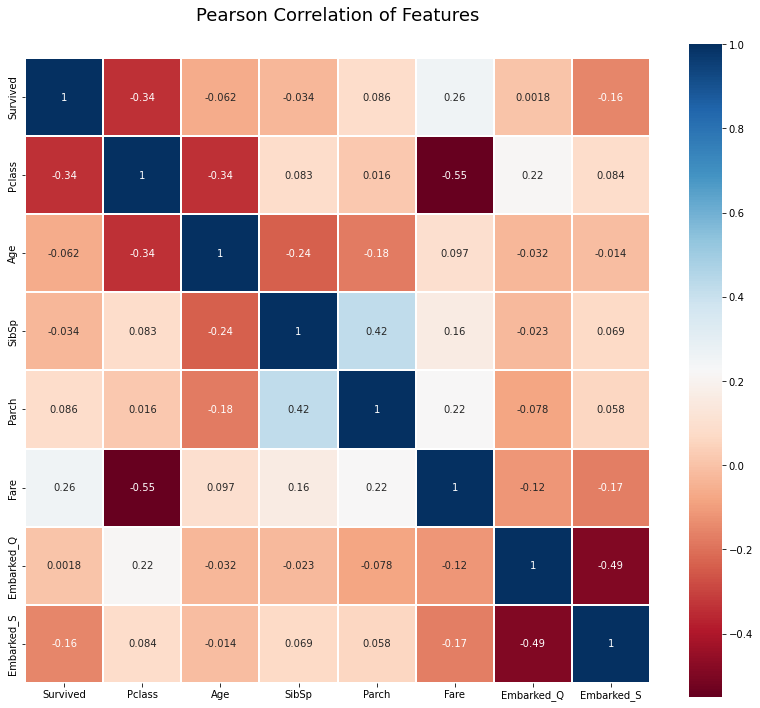

In [105]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap= colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков

C:\Users\andubenyuk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


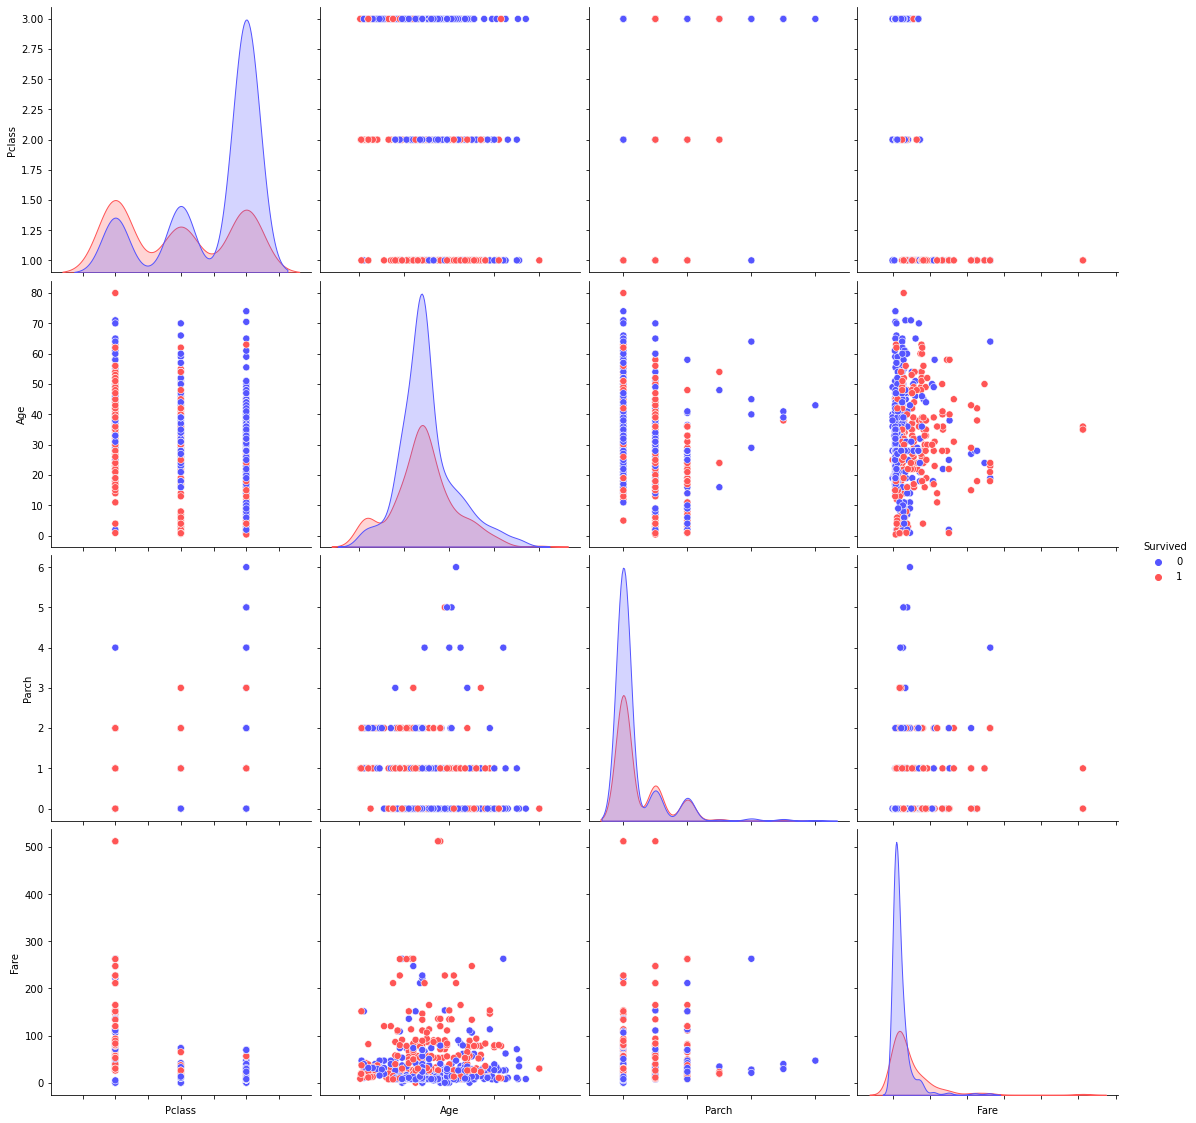

In [106]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [107]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [108]:
Data['AgeBin'].value_counts()

(16.0, 32.0]     522
(32.0, 48.0]     185
(-0.08, 16.0]     99
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBin, dtype: int64

Теперь переведём полученные интервалы в числа, используя `LabelEncoder`

In [109]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


In [110]:
np.corrcoef(Data['Age'], Data['Survived'])[0][1]

-0.062245355714099636

In [111]:
np.corrcoef(Data['AgeBin_Code'], Data['Survived'])[0][1]

-0.04178723664295552

### Задание 11

Бинаризуйте `Fare`, используя разбиение на 4 интервала

In [112]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)

Data['FareBin'].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64, right]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Сконструируем новые признаки, чтобы решить эти вопросы

### Задание 12

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`)

2) Создайте признак `FamilySize`, равный `Parch` + `SibSp` + `1`. Зачем добавлять `1`?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей

In [114]:
Data['NameLen'] = Data['Name'].str.len()

In [117]:
Data['FamilySize'] = Data['Parch'] + Data['SibSp'] + 1

In [119]:
Data['IsAlone'] = (Data['FamilySize'] == 1).astype(int)

In [120]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code,FareBin,NameLen,FamilySize,IsAlone
0,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",23,2,0
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,0,0,"(32.0, 48.0]",2,"(-0.512, 128.0]",51,2,0
2,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,"(16.0, 32.0]",1,"(-0.512, 128.0]",22,1,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",44,2,0
4,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]",2,"(-0.512, 128.0]",24,1,1


### Задание 13

Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом `Survived`

In [121]:
Data.corr()

C:\Users\ANDUBE~1\AppData\Local\Temp/ipykernel_18704/3328628840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,AgeBin_Code,NameLen,FamilySize,IsAlone
Survived,1.000000,-0.338447,-0.062245,-0.033743,0.085753,0.258216,0.001826,-0.155577,-0.041787,0.334347,0.018997,-0.205496
Pclass,-0.338447,1.000000,-0.342216,0.083148,0.015606,-0.549398,0.218389,0.084268,-0.359804,-0.221845,0.064830,0.136153
Age,-0.062245,-0.342216,1.000000,-0.235465,-0.177241,0.096507,-0.031932,-0.013528,0.939249,0.042306,-0.249049,0.169763
SibSp,-0.033743,0.083148,-0.235465,1.000000,0.422104,0.159394,-0.023044,0.069236,-0.220910,0.164261,0.895025,-0.585344
Parch,0.085753,0.015606,-0.177241,0.422104,1.000000,0.220608,-0.077893,0.057712,-0.139896,0.258542,0.782128,-0.586891
Fare,0.258216,-0.549398,0.096507,0.159394,0.220608,1.000000,-0.115235,-0.168756,0.124016,0.156482,0.218098,-0.272455
Embarked_Q,0.001826,0.218389,-0.031932,-0.023044,-0.077893,-0.115235,1.000000,-0.491888,-0.078654,-0.138776,-0.054162,0.080515
Embarked_S,-0.155577,0.084268,-0.013528,0.069236,0.057712,-0.168756,-0.491888,1.000000,0.015741,0.059960,0.075984,0.030647
AgeBin_Code,-0.041787,-0.359804,0.939249,-0.220910,-0.139896,0.124016,-0.078654,0.015741,1.000000,0.069548,-0.220671,0.124487
NameLen,0.334347,-0.221845,0.042306,0.164261,0.258542,0.156482,-0.138776,0.059960,0.069548,1.000000,0.240106,-0.405461


Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков

### Задание 14

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью

In [122]:
Data['Is_first_child'] = ((Data['Pclass'] == 1)&(Data['Age'] < 18)).astype(int) #дети 1-й класс

In [124]:
Data.corr()

C:\Users\ANDUBE~1\AppData\Local\Temp/ipykernel_18704/3328628840.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,AgeBin_Code,NameLen,FamilySize,IsAlone,Is_first_child
Survived,1.000000,-0.338447,-0.062245,-0.033743,0.085753,0.258216,0.001826,-0.155577,-0.041787,0.334347,0.018997,-0.205496,0.128409
Pclass,-0.338447,1.000000,-0.342216,0.083148,0.015606,-0.549398,0.218389,0.084268,-0.359804,-0.221845,0.064830,0.136153,-0.182901
Age,-0.062245,-0.342216,1.000000,-0.235465,-0.177241,0.096507,-0.031932,-0.013528,0.939249,0.042306,-0.249049,0.169763,-0.155334
SibSp,-0.033743,0.083148,-0.235465,1.000000,0.422104,0.159394,-0.023044,0.069236,-0.220910,0.164261,0.895025,-0.585344,-0.002514
Parch,0.085753,0.015606,-0.177241,0.422104,1.000000,0.220608,-0.077893,0.057712,-0.139896,0.258542,0.782128,-0.586891,0.129553
Fare,0.258216,-0.549398,0.096507,0.159394,0.220608,1.000000,-0.115235,-0.168756,0.124016,0.156482,0.218098,-0.272455,0.178388
Embarked_Q,0.001826,0.218389,-0.031932,-0.023044,-0.077893,-0.115235,1.000000,-0.491888,-0.078654,-0.138776,-0.054162,0.080515,-0.035633
Embarked_S,-0.155577,0.084268,-0.013528,0.069236,0.057712,-0.168756,-0.491888,1.000000,0.015741,0.059960,0.075984,0.030647,0.006948
AgeBin_Code,-0.041787,-0.359804,0.939249,-0.220910,-0.139896,0.124016,-0.078654,0.015741,1.000000,0.069548,-0.220671,0.124487,-0.150051
NameLen,0.334347,-0.221845,0.042306,0.164261,0.258542,0.156482,-0.138776,0.059960,0.069548,1.000000,0.240106,-0.405461,0.080611


### Задание 15

Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

# Бонус

### Задание 16

Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

- Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности  

- Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным

In [ ]:
def prediction(x): 
    # x - один объект
    

In [129]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

NameError: name 'prediction' is not defined

In [ ]:
Data['Survived']

1) Разобъем данные на тренировочную и тестовую часть с помощью train_test_split

2) Обучим KNN на тренировочной части, сделаем предсказание на тесте и вычислим долю правильных ответов

3) С помощью написанной нами раннее модели сделаем предсказание на тесте и оценим его качество

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [126]:
model = KNeighborsClassifier()

model.fit(X_train, y_train) # обучаем модель

KNeighborsClassifier()

In [127]:
pred_knn = model.predict(X_test) # делаем предсказание на тесте
pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [130]:
accuracy_score(y_test, pred_knn) #  доля прав.ответов knn

0.7117117117117117

In [131]:
pred_our = X_test.apply(lambda x: prediction(x), axis=1)

accuracy_score(y_test, pred_our) # доля прав.ответов нашей модели

NameError: name 'prediction' is not defined